In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv("Reviews.csv", index_col=0)
df.head()

Score                                             Review
ID                                                          
0       5  Absolutely love my Dyson UP16!Absolutely love ...
1       5  Great upright vacuum if you get it at the righ...
2       5  Do bother! Buy this one!(Title in reference to...
3       5  Wonderful!This is a dream vacuum cleaner....li...
4       5  Good VacReplaced Hoover vacumn cleaner with dy...

Análisis de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   580 non-null    int64 
 1   Review  580 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.6+ KB


<Axes: xlabel='Score'>

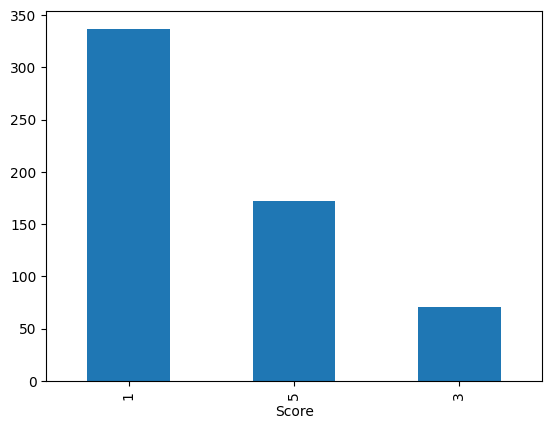

In [4]:
df['Score'].value_counts().plot(kind = 'bar')

In [5]:
df['Score'].value_counts()

Score
1    337
5    172
3     71
Name: count, dtype: int64

In [6]:
df['Score'].value_counts(normalize=True)

Score
1    0.581034
5    0.296552
3    0.122414
Name: proportion, dtype: float64

In [7]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_en = stopwords.words('english')

from nltk import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def limpiarCadena(cadena):
  resultado = []
  #Se agrega un espacio antes de cada mayúscula
  for char in cadena:
    if char.isupper():
      resultado.append(' ')
    resultado.append(char)
  resultado = ''.join(resultado)

  #Se quitan las mayúsculas
  resultado = resultado.lower()
  #Se quita la puntuación
  resultado = resultado.translate(str.maketrans("", "", string.punctuation))

  resultado = word_tokenize(resultado) #Se tokeniza
  resultado = [token for token in resultado if token not in stop_words_en] #Se quitan stopwords
  resultado = [lemmatizer.lemmatize(word) for word in resultado] #Se lemmatiza
  resultado = ' '.join(resultado) #Lo devolvemos a string

  return resultado

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
df.iloc[105, 1]

'Absolutely love itHubby and I bought this cleaner to do the carpets and rugs in our disgusting rental property in April 2024. We have previously owned a Bissell carpet cleaner about 9-10 yrs ago and it survived 10 yrs of use every 3-6m including puppy training and living in a mining town (extreme dust and coal in the air).\nThe good:\n- It reallllly cleans! First go every time. We tested it on our rentals carpets and its worked like a charm but the real star was our 3yr old extremely dirty long shagpile rug. It was brown and has come back to brand new grey tones! Super impressed.\n- The brushes really scrub the carpets/rugs as it goes, rather than just spraying water on then sucking it off like a vacuume would. This thing gets reallly deep into the fibres with all the bristles resulting in your carpets being "fluffed" and super clean.\n- Lifts even the most stubborn stains.\n- Completely gets rid of smells and lingering stenches in carpets even if they\'ve supposedly been cleaned only

In [9]:
df['CleanReview'] = df['Review'].apply(limpiarCadena)
df.iloc[105, 2]

'absolutely love hubby bought cleaner carpet rug disgusting rental property april 2024 previously owned bissell carpet cleaner 910 yr ago survived 10 yr use every 36m including puppy training living mining town extreme dust coal air good reallllly clean first go every time tested rental carpet worked like charm real star 3yr old extremely dirty long shagpile rug brown come back brand new grey tone super impressed brush really scrub carpetsrugs go rather spraying water sucking like vacuume would thing get reallly deep fibre bristle resulting carpet fluffed super clean lift even stubborn stain completely get rid smell lingering stench carpet even theyve supposedly cleaned 6m ago new rental carpet releasing currydirtysweatcumin type smell theyve completely stopped since used machine easily sourced got sale godfreys love handle shape really make easy hold use nice big loop easy grab angle suitable arthritis hand etc like cord wrapper back make easy store contain cord go unfurl need prevent

In [10]:
df.head()

Score                                             Review  \
ID                                                             
0       5  Absolutely love my Dyson UP16!Absolutely love ...   
1       5  Great upright vacuum if you get it at the righ...   
2       5  Do bother! Buy this one!(Title in reference to...   
3       5  Wonderful!This is a dream vacuum cleaner....li...   
4       5  Good VacReplaced Hoover vacumn cleaner with dy...   

                                          CleanReview  
ID                                                     
0   absolutely love dyson u p16 absolutely love dy...  
1   great upright vacuum get right price said woul...  
2   bother buy one title reference last vacuum cle...  
3   wonderful dream vacuum cleanerlight easy manoe...  
4   good vac replaced hoover vacumn cleaner dyson ...

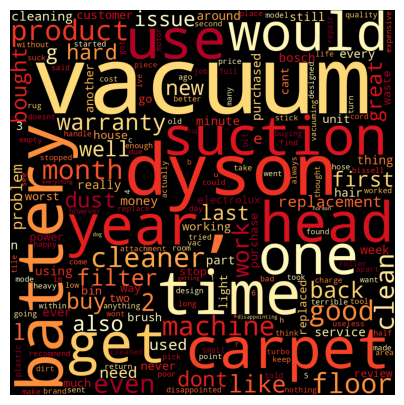

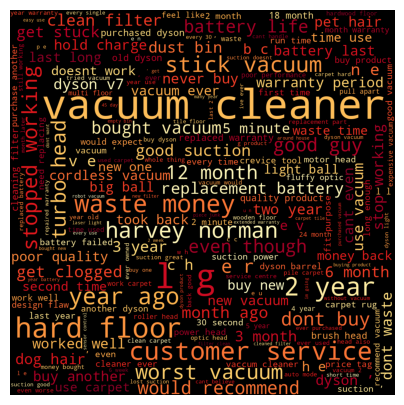

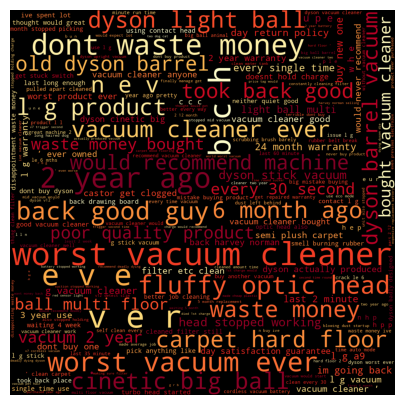

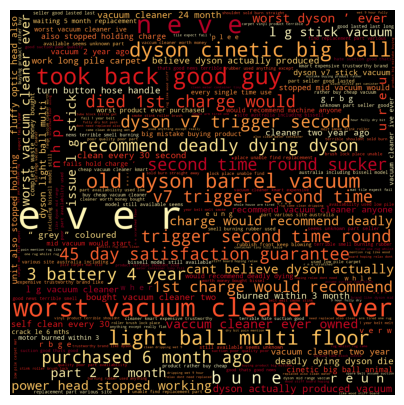

In [11]:
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

claseActual = 1

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_One_1gram = get_ngrams(1,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_2gram = get_ngrams(2,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_3gram = get_ngrams(3,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_4gram = get_ngrams(4,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

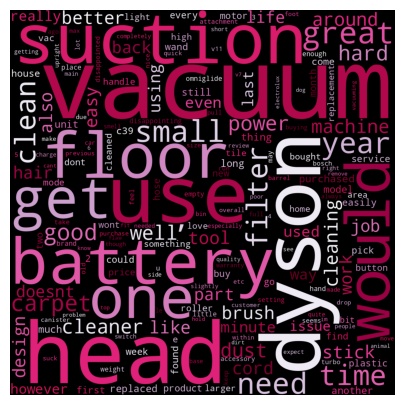

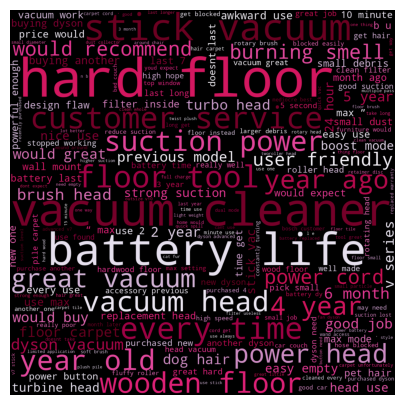

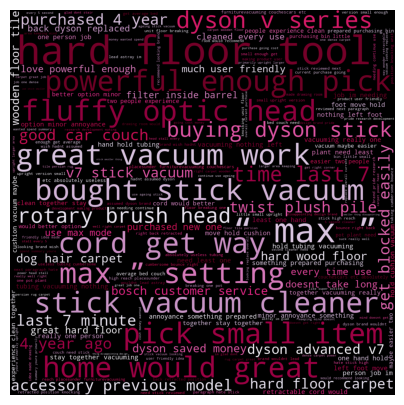

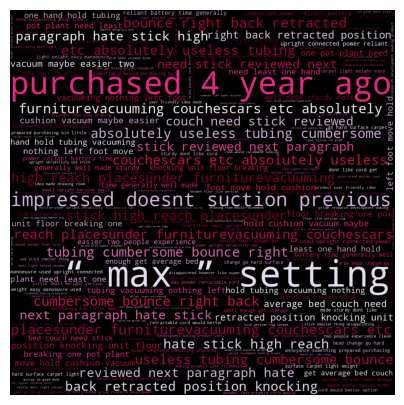

In [12]:
claseActual = 3

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_Three_1gram = get_ngrams(1,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_2gram = get_ngrams(2,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_3gram = get_ngrams(3,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_4gram = get_ngrams(4,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

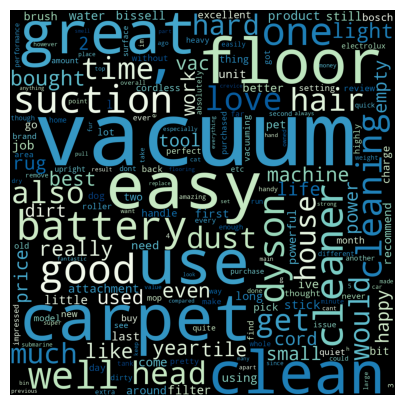

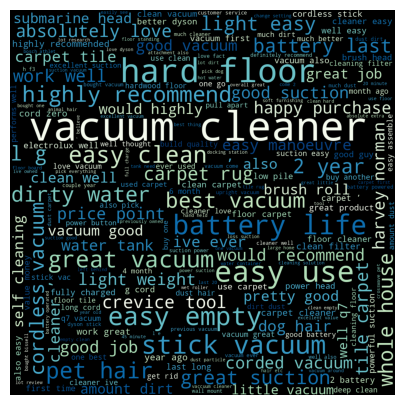

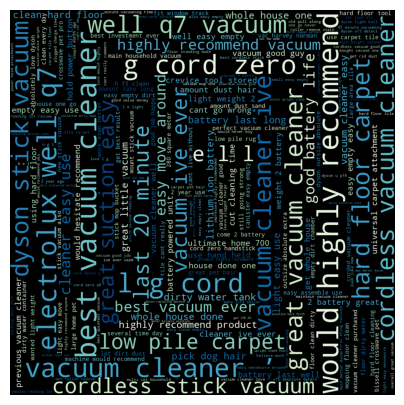

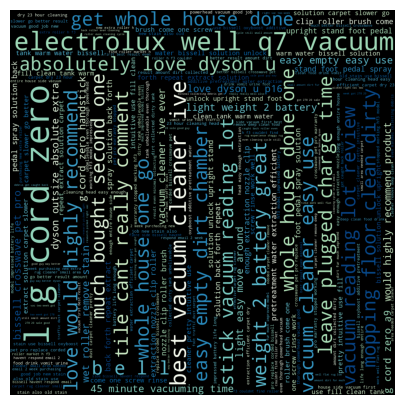

In [13]:
claseActual = 5

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_Five_1gram = get_ngrams(1,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_2gram = get_ngrams(2,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_3gram = get_ngrams(3,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_4gram = get_ngrams(4,df[df['Score'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 839.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [16]:
def vectorizarCadena(cadena):
  cadenaVectorizada = nlp(cadena).vector #transform text to a vector
  return cadenaVectorizada

In [17]:
df['VectorizedReview'] = df['CleanReview'].apply(vectorizarCadena)
df.head()

Score                                             Review  \
ID                                                             
0       5  Absolutely love my Dyson UP16!Absolutely love ...   
1       5  Great upright vacuum if you get it at the righ...   
2       5  Do bother! Buy this one!(Title in reference to...   
3       5  Wonderful!This is a dream vacuum cleaner....li...   
4       5  Good VacReplaced Hoover vacumn cleaner with dy...   

                                          CleanReview  \
ID                                                      
0   absolutely love dyson u p16 absolutely love dy...   
1   great upright vacuum get right price said woul...   
2   bother buy one title reference last vacuum cle...   
3   wonderful dream vacuum cleanerlight easy manoe...   
4   good vac replaced hoover vacumn cleaner dyson ...   

                                     VectorizedReview  
ID                                                     
0   [-0.15612844, 0.4375392, -1.3629997, -0.225732...  
1   [-0.21165106, 2.250728, -2.6952167, 0.34412056...  
2   [-0.72277904, 0.5402635, -1.1797854, 0.7644245...  
3   [0.054425485, 1.49656, -1.268777, -1.3761523, ...  
4   [-0.35827368, 0.9862508, -1.4762875, -0.367967...

In [18]:
from sklearn.manifold import TSNE

# we assign the values ​​of X and Y
X = df['VectorizedReview']
X = np.concatenate(X, axis = 0).reshape(-1,300)

# instantiate the TSNE model
modelo = TSNE(n_components =2)
#we adapt the data to the model
resultado = modelo.fit_transform(X)

df['tsne_1'] = resultado[:,0]
df['tsne_2'] = resultado[:,1]

df.head()

Score                                             Review  \
ID                                                             
0       5  Absolutely love my Dyson UP16!Absolutely love ...   
1       5  Great upright vacuum if you get it at the righ...   
2       5  Do bother! Buy this one!(Title in reference to...   
3       5  Wonderful!This is a dream vacuum cleaner....li...   
4       5  Good VacReplaced Hoover vacumn cleaner with dy...   

                                          CleanReview  \
ID                                                      
0   absolutely love dyson u p16 absolutely love dy...   
1   great upright vacuum get right price said woul...   
2   bother buy one title reference last vacuum cle...   
3   wonderful dream vacuum cleanerlight easy manoe...   
4   good vac replaced hoover vacumn cleaner dyson ...   

                                     VectorizedReview     tsne_1     tsne_2  
ID                                                                           
0   [-0.15612844, 0.4375392, -1.3629997, -0.225732...   2.057238  -0.509273  
1   [-0.21165106, 2.250728, -2.6952167, 0.34412056...  -3.600766   8.862353  
2   [-0.72277904, 0.5402635, -1.1797854, 0.7644245...  -0.661731   2.320224  
3   [0.054425485, 1.49656, -1.268777, -1.3761523, ...  10.512578 -15.526262  
4   [-0.35827368, 0.9862508, -1.4762875, -0.367967...  -4.411776   5.017724

In [19]:
import plotly.express as px
fig = px.scatter(data_frame=df,
                x = df['tsne_1'],
                y = df['tsne_2'],
                template = 'plotly_dark',
                hover_data=['Review'],
                color = df['Score'])

fig.show()

In [20]:
mapper={
    1:0,
    3:1,
    5:2,

}

df['ScoreMap'] = df['Score'].map(mapper)
#check if the change was made
df.head()

Score                                             Review  \
ID                                                             
0       5  Absolutely love my Dyson UP16!Absolutely love ...   
1       5  Great upright vacuum if you get it at the righ...   
2       5  Do bother! Buy this one!(Title in reference to...   
3       5  Wonderful!This is a dream vacuum cleaner....li...   
4       5  Good VacReplaced Hoover vacumn cleaner with dy...   

                                          CleanReview  \
ID                                                      
0   absolutely love dyson u p16 absolutely love dy...   
1   great upright vacuum get right price said woul...   
2   bother buy one title reference last vacuum cle...   
3   wonderful dream vacuum cleanerlight easy manoe...   
4   good vac replaced hoover vacumn cleaner dyson ...   

                                     VectorizedReview     tsne_1     tsne_2  \
ID                                                                            
0   [-0.15612844, 0.4375392, -1.3629997, -0.225732...   2.057238  -0.509273   
1   [-0.21165106, 2.250728, -2.6952167, 0.34412056...  -3.600766   8.862353   
2   [-0.72277904, 0.5402635, -1.1797854, 0.7644245...  -0.661731   2.320224   
3   [0.054425485, 1.49656, -1.268777, -1.3761523, ...  10.512578 -15.526262   
4   [-0.35827368, 0.9862508, -1.4762875, -0.367967...  -4.411776   5.017724   

    ScoreMap  
ID            
0          2  
1          2  
2          2  
3          2  
4          2

In [21]:
from sklearn.model_selection import train_test_split

X = df['VectorizedReview']
X = np.concatenate(X, axis = 0).reshape(-1, 300)
y = df['ScoreMap']

#separate training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=101, stratify=y)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
# we adjust training data so that it is valid for the model
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a variable to monitor the loss in the model
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=8,
                               restore_best_weights=True)
# we adjust training data so that it is valid for the model
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [23]:
#the "skeleton" of the model is initialized
model = Sequential()

#we add layers to the model
model.add(Dense(units=40, activation='relu', input_dim=300))
model.add(Dropout(0.2))
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

#compile the model
model.compile(optimizer= Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#train model
history = model.fit(X_train,
                    y_train,
                    batch_size=50,
                    epochs=120,
                    validation_data=(X_test,  y_test),
                    callbacks=[early_stopping])

Epoch 1/120
3/3 [==============================] - 1s 150ms/step - loss: 1.0412 - accuracy: 0.5776 - val_loss: 0.9682 - val_accuracy: 0.5797
Epoch 2/120
3/3 [==============================] - 0s 28ms/step - loss: 1.0055 - accuracy: 0.5862 - val_loss: 0.9600 - val_accuracy: 0.5797
Epoch 3/120
3/3 [==============================] - 0s 25ms/step - loss: 0.9980 - accuracy: 0.5862 - val_loss: 0.9530 - val_accuracy: 0.5797
Epoch 4/120
3/3 [==============================] - 0s 28ms/step - loss: 0.9967 - accuracy: 0.5776 - val_loss: 0.9478 - val_accuracy: 0.5797
Epoch 5/120
3/3 [==============================] - 0s 31ms/step - loss: 0.9812 - accuracy: 0.5862 - val_loss: 0.9438 - val_accuracy: 0.5797
Epoch 6/120
3/3 [==============================] - 0s 30ms/step - loss: 0.9670 - accuracy: 0.5776 - val_loss: 0.9402 - val_accuracy: 0.5797
Epoch 7/120
3/3 [==============================] - 0s 34ms/step - loss: 0.9639 - accuracy: 0.5776 - val_loss: 0.9375 - val_accuracy: 0.5797
Epoch 8/120
3/3 [==

In [25]:
# convert the metric to a dataframe
metrics = pd.DataFrame(history.history)
metrics.head()

loss  accuracy  val_loss  val_accuracy
0  1.041188  0.577586  0.968198      0.579741
1  1.005469  0.586207  0.960006      0.579741
2  0.997957  0.586207  0.953030      0.579741
3  0.996719  0.577586  0.947808      0.579741
4  0.981235  0.586207  0.943796      0.579741

In [26]:
metrics.tail()

loss  accuracy  val_loss  val_accuracy
115  0.746000  0.698276  0.824109      0.631465
116  0.764145  0.620690  0.823353      0.631465
117  0.765569  0.698276  0.822436      0.637931
118  0.762446  0.689655  0.821341      0.644397
119  0.795573  0.681035  0.819971      0.648707

<Axes: >

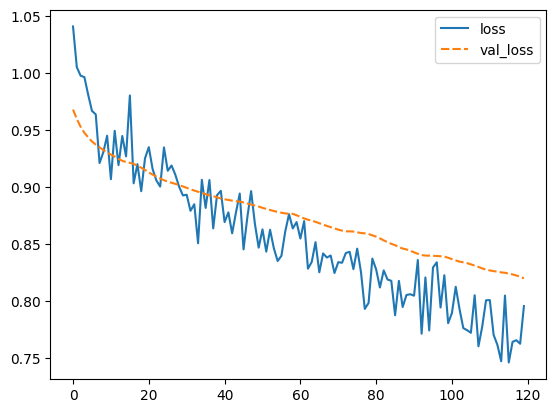

In [27]:
import seaborn as sns
# we graph the metrics (loss)
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

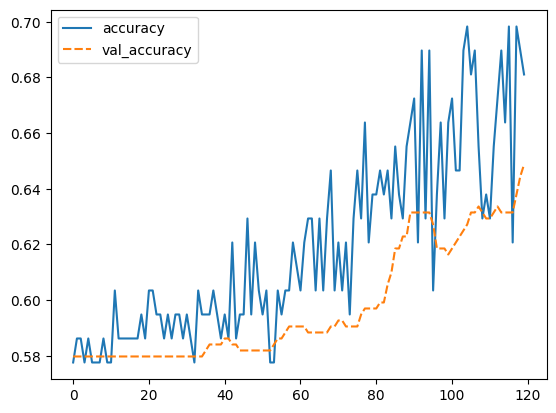

In [28]:
# we graph the metrics (accuracy)
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [29]:
y_pred = model.predict(X_test) #  predict() function enables us to predict the labels of the data

# transform the data to create the classsification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

#show classification report
target_names = ['1 Star', '3 Stars', '5 Stars']
print(classification_report(y_test, y_pred, target_names=target_names))

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

      1 Star       0.63      0.99      0.77       269
     3 Stars       0.00      0.00      0.00        57
     5 Stars       0.81      0.25      0.39       138

    accuracy                           0.65       464
   macro avg       0.48      0.41      0.39       464
weighted avg       0.61      0.65      0.56       464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
y_test

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,

In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<Axes: >

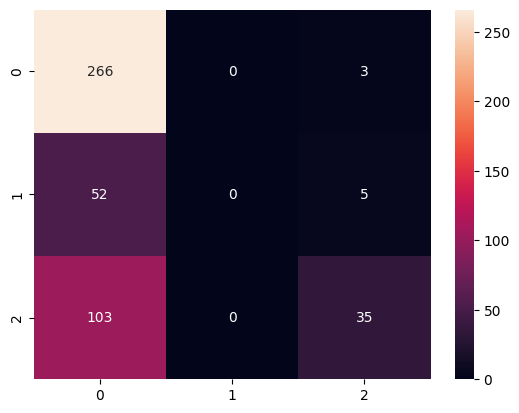

In [32]:
#shows the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='.0f')

In [33]:
X_train.shape

(116, 300)

In [34]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

y_test = to_categorical(y_test, 3)

model = Sequential()

model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/200
4/4 [==============================] - 1s 109ms/step - loss: 0.9673 - accuracy: 0.5862 - val_loss: 0.9380 - val_accuracy: 0.5797
Epoch 2/200
4/4 [==============================] - 0s 36ms/step - loss: 0.9638 - accuracy: 0.5603 - val_loss: 0.8930 - val_accuracy: 0.5797
Epoch 3/200
4/4 [==============================] - 0s 40ms/step - loss: 0.9197 - accuracy: 0.6034 - val_loss: 0.8812 - val_accuracy: 0.5797
Epoch 4/200
4/4 [==============================] - 0s 37ms/step - loss: 0.8694 - accuracy: 0.6207 - val_loss: 0.8664 - val_accuracy: 0.5948
Epoch 5/200
4/4 [==============================] - 0s 41ms/step - loss: 0.7962 - accuracy: 0.7155 - val_loss: 0.8512 - val_accuracy: 0.6444
Epoch 6/200
4/4 [==============================] - 0s 40ms/step - loss: 0.7737 - accuracy: 0.7155 - val_loss: 0.8449 - val_accuracy: 0.5970
Epoch 7/200
4/4 [==============================] - 0s 37ms/step - loss: 0.7940 - accuracy: 0.6638 - val_loss: 0.8278 - val_accuracy: 0.6250
Epoch 8/200
4/4 [==

In [36]:
metrics = pd.DataFrame(history.history)
metrics.head()

loss  accuracy  val_loss  val_accuracy
0  0.967276  0.586207  0.938046      0.579741
1  0.963804  0.560345  0.893030      0.579741
2  0.919704  0.603448  0.881209      0.579741
3  0.869375  0.620690  0.866381      0.594828
4  0.796223  0.715517  0.851209      0.644397

In [37]:
metrics.tail()

loss  accuracy  val_loss  val_accuracy
37  0.336814  0.870690  0.733928      0.709052
38  0.311525  0.922414  0.735988      0.734914
39  0.269029  0.931035  0.762694      0.726293
40  0.272858  0.905172  0.737881      0.737069
41  0.290960  0.922414  0.745667      0.709052

<Axes: >

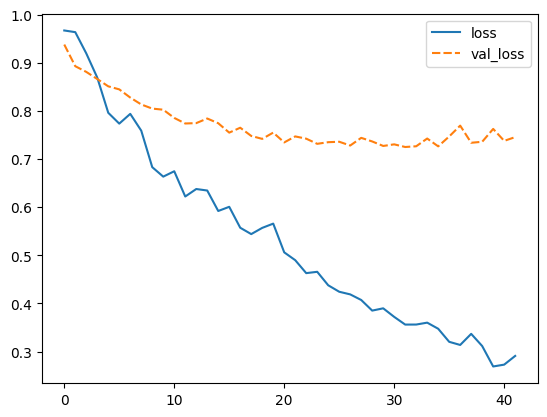

In [38]:
import seaborn as sns
# we graph the metrics (loss)
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

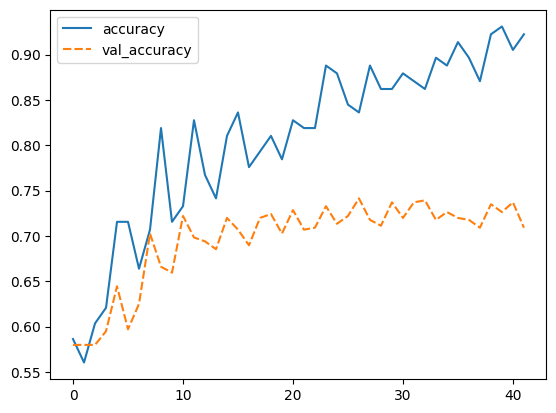

In [39]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
target_names = ['1 Star', '3 Stars', '5 Stars']
print(classification_report(y_test, y_pred, target_names=target_names))


15/15 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

      1 Star       0.75      0.93      0.83       269
     3 Stars       0.00      0.00      0.00        57
     5 Stars       0.71      0.66      0.68       138

    accuracy                           0.74       464
   macro avg       0.49      0.53      0.51       464
weighted avg       0.65      0.74      0.69       464



In [41]:
y_test

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0,
       0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,

In [42]:
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,

<Axes: >

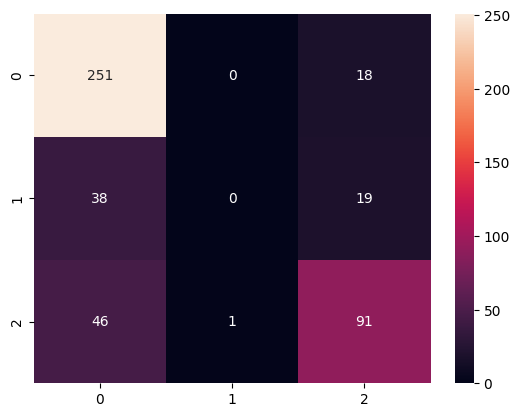

In [43]:
#shows the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='.0f')

In [44]:
def predecirClase(text):
  cleanText = limpiarCadena(text)
  vectorizedText = vectorizarCadena(cleanText)
  vectorizedText = vectorizedText.reshape(1,-1)
  vectorizedText = scaler.transform(vectorizedText)
  vectorizedText = vectorizedText.reshape(1,300,1) #transforms the structure of the text to be able to use it in the predict function

  prediccion = model.predict(vectorizedText)
  print(f'''
  Category\t Probability
  -----------------------
  1 STAR:\t {prediccion[0][0]}
  3 STARS:\t {prediccion[0][1]}
  5 STARS:\t {prediccion[0][2]}
  ''')

In [47]:
"""
5 STARS    [0,171] 172 total
3 STARS    [172,242] 71 total
1 STARS    [243,579] 337 total

Interesantes: 242,

"""
numReview = 178
miReview = df.iloc[numReview,1]
print(miReview)
print()
predecirClase(miReview)
print("Real category: ", df.iloc[numReview,0])

Great when it worksGood suction, love the cordless aspect however it worked really well for 6 months then the battery died, replaced the battery. Then it only worked for 1 to 2 minutes even tho fully charged.. wouldn't purchase another one.

1/1 [==============================] - 0s 39ms/step

  Category	 Probability
  -----------------------
  1 STAR:	 0.7660616636276245
  3 STARS:	 0.133668452501297
  5 STARS:	 0.10026991367340088
  
Real category:  3
